0.015277778


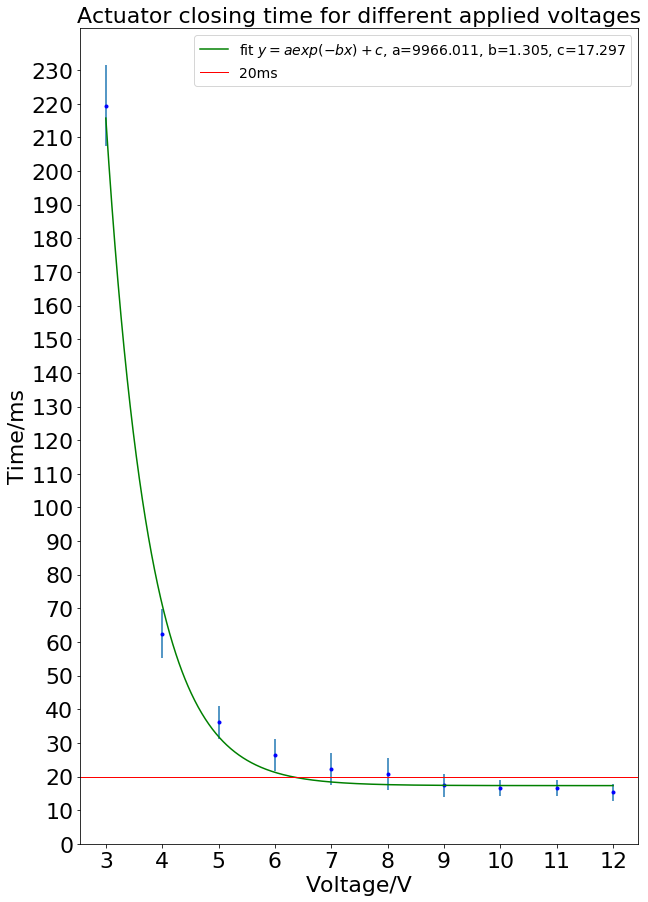

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
params = {'legend.fontsize': '14',
          'figure.figsize': (10, 15),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)
data = np.array([np.arange(3,13,1),\
                [0.219444444,0.0625,0.036111111,0.026388889,0.022222222,0.020833333,0.017361111,0.016666667,0.016666667,0.015277778],\
                [0.012028131,0.007216878,0.004811252,0.004811252,0.004811252,0.004811252,0.003402069,0.002405626,0.002405626,0.002405626]])
plt.plot(data[0],data[1]*10**3,'b.')
plt.errorbar(data[0],data[1]*10**3,yerr=data[2]*10**3,ls='None')
def poly(x,a,b,c):return a*np.exp(-b*x)+c
popt, pcov = scipy.optimize.curve_fit(poly,data[0],data[1]*10**3,p0=[400,1,20],sigma=data[2]*10**3)
x = np.linspace(3,len(data[0])+2,1000)
plt.plot(x,poly(x,*popt),'g-',label='fit $y = a exp(-bx)+c$, a={:.3f}, b={:.3f}, c={:.3f}'.format(popt[0],popt[1],popt[2]))
plt.yticks(np.arange(0, 240, step=10))
plt.xticks(np.arange(3,13,step=1))
plt.axhline(linewidth=1,y=20,color = 'r',label='20ms')
plt.xlabel('Voltage/V')
plt.ylabel('Time/ms')
plt.title('Actuator closing time for different applied voltages')
plt.legend()
print(np.mean(data[1][9]))
plt.show()